# Homework 5: Softmax Regression

Trong bài tập này, các bạn sẽ sử dụng kiến thức đã học về softmax regression để giải quyết bài toán phân loại nhiều lớp, cụ thể phân loại đồ dùng thời trang (áo, quần, giày dép, ....) từ bộ dữ liệu [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist).

<div style="margin-left: auto;margin-right: auto;width: 60%"><img src="./imgs/mnist_fashion.jpeg" /></div>
<div style="text-align:center">Mẫu dữ liệu từ tập Fashion-MNIST</div>

## Giới thiệu
Để hoàn tất bài tập này, các bạn cần nắm rõ những kiến thức sau:
* Softmax Regression
* Cách lấy đạo hàm cho các tham số trong mô hình trên.
* Giải thuật gradient descent.

Bạn có thể tham khảo lại bài giảng để nắm vững các nội dung này. Ngoài ra, các bạn có thể đặt câu hỏi cho đội ngũ giảng viên nếu có thắc mắc.

Bạn cần giải quyết bài tập này bằng cả **Numpy** và **Tensorflow**.

Lưu ý: để tiện cho việc phân biệt giữa lớp python và lớp trong bài toán phân loại, người viết quy ước rằng khi viết **class** nghĩa là đang nói về python class, khi viết **lớp** nghĩa là đang nói đến lớp của dữ liệu cần phân loại.

## Hướng dẫn làm và nộp bài
1./ Ở mỗi bài tập, các bạn sẽ được yêu cầu điền phần còn thiếu vào trong hàm. Các cell cần điền sẽ có dòng đầu tiên như sau:
```python
# GRADED FUNCTION: <tên hàm>
...
```
Trong cell đó, các bạn sẽ code phần đáp án của mình giữa 2 phần:
```python
### START CODE HERE ###
<phần bài làm>
### END CODE HERE ###
```
Sau đó, các bạn trả về giá trị đầu ra của hàm số (nếu có) sau phần `return` (ví du: `return output`, bỏ giá trị **None** đi)

2./ Để kiểm tra lỗi nhanh cho hàm bạn vừa viết, thực hiện chạy phần `Sanity check` ở sau mỗi TO_DO.  

3./ Tiếp theo, sau khi đã vượt qua Sanity check, bạn chạy file `check_score.py` để kiểm tra điểm mà bạn hiện tại cho phần bài làm của bạn. Nếu không thay đổi tên và vị trí mặc định của file bài tập, bạn có thể gọi dòng lệnh sau từ terminal để nộp bài:
```
python check_score.py
```
Nếu bạn đã thay đổi vị trí hoặc tên bài tập. Bạn trỏ đến vị trí của bài tập bằng dòng lệnh sau:
```
python check_score.py -filepath <PATH_ĐẾN_FILE_.IPYNB_BÀI_LÀM_CỦA_BẠN>
```
Sau khi chạy dòng lệnh trên, vui lòng điền `username`, bạn sẽ nhận được kết quả trả về cho bài làm của bạn.  

**Lưu ý:** Bạn có thể kiểm tra điểm bằng cách chạy file `check_score.py` bao nhiêu lần bạn muốn.

## Điểm số
Điểm tối đa cho bài tập này là **100 điểm**. Trong đó, TODO 8 là bài tập tự chọn (20 điểm). Bạn có thể chọn không làm mà vẫn đạt 100% điểm của bài tập này (**80 điểm**).

#### IMPORT CÁC THƯ VIỆN CẦN THIẾT
Nếu chạy trên máy tính cá nhân, trước hết bạn cần install các thư viện cần thiết bằng cách chạy dòng lệnh sau trong terminal:
```
pip install -r requirements.txt
```
Nếu bạn chạy trên nền tảng Google Colab, bạn có thể bổ qua bước trên.

In [44]:
# IMPORT
import numpy as np
import gzip
import matplotlib.pyplot as plt
import tensorflow as tf

## Tải dữ liệu
Các bạn chạy cell bên dưới để tải bộ dữ liệu cũng như các hàm dùng để test cách cài đặt của các bạn:

In [45]:
# from google_drive_downloader import GoogleDriveDownloader as gdd
# gdd.download_file_from_google_drive(file_id='1umcIzISPX2FhMT3OBg-Io7LninG7Hste', dest_path='./assignment3.zip', unzip=True)

Dữ liệu tải xuống của bạn bao gồm:

* Folder `fashion-mnist`: chứa 4 zip files dữ liệu.
* File softmax_unittest.npy: được dùng để kiểm tra một số hàm mà bạn cài đặt.

In [46]:
!ls assignment3

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Các hàm bổ trợ dùng để đọc dữ liệu
Các hàm bổ trợ trong việc đọc dữ liệu đã được định nghĩa sẵn, các bạn **thực hiện chạy** những hàm này mà không cần chỉnh sửa.

In [47]:
def read_mnist_gz(data_path, offset):
    with gzip.open(data_path, 'rb') as f:
        dataset = np.frombuffer(f.read(), dtype=np.uint8, offset=offset)

    return dataset


def get_mnist_data(sampling_step=20):
    print('Reading fashion MNIST data...')
    train_x = read_mnist_gz('./assignment3/fashion-mnist/train-images-idx3-ubyte.gz', 16)
    train_y = read_mnist_gz('./assignment3/fashion-mnist/train-labels-idx1-ubyte.gz', 8)
    test_x = read_mnist_gz('./assignment3/fashion-mnist/t10k-images-idx3-ubyte.gz', 16)
    test_y = read_mnist_gz('./assignment3/fashion-mnist/t10k-labels-idx1-ubyte.gz', 8)
    num_train = len(train_y)
    num_test = len(test_y)

    train_x = train_x.reshape((num_train, 28*28))
    test_x = test_x.reshape((num_test, 28*28))

    val_x = train_x[50000:,:]
    val_y = train_y[50000:]
    train_x = train_x[:50000,:]
    train_y = train_y[:50000]

    train_x = train_x[0::sampling_step,:]
    train_y = train_y[0::sampling_step]
    val_x = val_x[0::sampling_step,:]
    val_y = val_y[0::sampling_step]
    test_x = test_x[0::sampling_step,:]
    test_y = test_y[0::sampling_step]
    return train_x.astype(np.float32), train_y, val_x.astype(np.float32), val_y, test_x.astype(np.float32), test_y

def get_side(img, side_type, n = 5):
    h, w = img.shape
    if side_type == "horizontal":
        return np.ones((h,n))
    return np.ones((n,w))

def show_gallery(ims,n=5, shuffle=True):
    images = []
    vertical_images = []
    if shuffle:
        np.random.shuffle(ims)
    vertical_images = []
    for i in range(n*n):
        img = ims[i].reshape(28,28)
        hside = get_side(img,side_type="horizontal")
        images.append(img)
        images.append(hside)
        
        if (i+1) % n == 0:
            himage=np.hstack((images))
            vside = get_side(himage, side_type="vertical")
            vertical_images.append(himage)
            vertical_images.append(vside)
            
            images = []
        
    gallery = np.vstack((vertical_images))
    plt.figure(figsize=(20,20))
    plt.axis("off")
    plt.imshow(gallery.astype(np.uint8), cmap="gray")
    plt.show()

def add_one(x):
    """add_one
    This function add ones as an additional feature for x.

    :param x: input data
    """
    x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
    return x

def create_one_hot(labels, num_k=10):
    """create_one_hot
    This function creates a one-hot (one-of-k) matrix based on the given labels

    :param labels: list of labels, each label is one of 0, 1, 2,... , num_k - 1
    :param num_k: number of classes we want to classify
    """
    eye_mat = np.eye(num_k)
    eye_mat = eye_mat[labels, :].astype(np.float32)
    return eye_mat

## Dữ liệu fashion MNIST

Ta có thể đọc tập dữ liệu này bằng hàm `get_mnist_data()`:

In [48]:
train_x, train_y, val_x, val_y, test_x, test_y = get_mnist_data()

Reading fashion MNIST data...


Tập dữ liệu này gồm các ảnh xám kích thước $28 \times 28$. Có tất cả 50000 ảnh train, 10000 ảnh validation và 10000 ảnh test. Mỗi ảnh thuộc một trong 10 loại quần, áo, giày, túi xách, v.v. Tuy nhiên trong bài tập này ta chỉ lấy 2500 ảnh train, 500 ảnh validation và 500 ảnh test.

In [49]:
print("train_x: " ,train_x.shape)
print("train_y: ", train_y.shape)
print("val_x:   ", val_x.shape)
print("val_y:   ", val_y.shape)
print("test_x:  ", test_x.shape)
print("test_y:  ", test_y.shape)

train_x:  (2500, 784)
train_y:  (2500,)
val_x:    (500, 784)
val_y:    (500,)
test_x:   (500, 784)
test_y:   (500,)


In [50]:
#show_gallery(train_x, n=5, shuffle=True)

Giá trị của `train_y` và `test_y` có thể là 0, 1, ..., 9 thay vì là 0 và 1 như bài 2 (Logistic Regression). Ngoài ra, dữ liệu ảnh khi được đọc lên sẽ có dạng tensor 2D (3500x784).

## Chuẩn hóa dữ liệu
Trong bước này, ta sẽ chuẩn hóa dữ liệu `train_x`, `val_x` và `test_x` theo cách xem các pixel khác nhau trong ảnh là cùng 1 loại đặc trưng (như đã đề cập trong bài tập Logistic Regression).

\begin{equation}
\overline{x} = \frac{1}{mRC}\sum_{i=0}^{m-1}{\sum_{r=0}^{R-1}{\sum_{c=0}^{C-1}{x_{rc}^{(i)}}}} \tag{3}
\end{equation}

\begin{equation}
\sigma=\sqrt{\frac{1}{mRC}\sum_{i=0}^{m-1}{\sum_{r=0}^{R-1}{\sum_{c=0}^{C-1}{(x_{rc}^{(i)}-\overline{x})^2}}}} \tag{4}
\end{equation}

Sau khi có được mean và std trên toàn bộ data huấn luyện, ta chuẩn hóa các mẫu trong tập huấn luyện theo cách sau:

\begin{equation}
x^{(i)} = \frac{x^{(i)}-\overline{x}}{\sigma} \tag{5}
\end{equation} 

Tuy nhiên, do tập dữ liệu MNIST khi load đã được đặt dưới dạng tensor 2D, nên trong công thức tính tổng chỉ còn $m$ và $R=784$.

### TODO 1: normalize (10)

In [51]:
# GRADED FUNCTION: normalize
from re import X


def normalize(train_x, val_x, test_x):
    """TODO 1: Thực hiện hàm chuẩn hoá từng dự liệu trên toàn bộ pixel của ảnh.
    Hàm này tính giá trị trung bình và độ lệch chuẩn của tất cả các pixel có trong tập hình ảnh huấn luyện train_x
        và thực hiện chuẩn hoá dữ liệu trên tập train_x, val_x và test_x bằng các giá trị này.
    
    Input:
        - train_x: mảng numpy, train_x.shape = (num_samples, num_feat). Là tập dữ liệu ảnh huấn luyện.
        - test_x: mảng numpy, train_x.shape = (num_samples, num_feat). Là tập dữ liệu ảnh kiểm định.
        - test_x: mảng numpy, train_x.shape = (num_samples, num_feat). Là tập dữ liệu ảnh đánh giá.
        Với: num_feat = image_height*image_width
    Output:
        - norm_train_x: tương tự như mảng train_x. Là tập dữ liệu ảnh huấn luyện đã được chuẩn hoá.
        - norm_val_x: tương tự như mảng val_x. Là tập dữ liệu ảnh kiểm định đã được chuẩn hoá.
        - norm_test_x: tương tự như mảng test_x. Là tập dữ liệu ảnh đánh giá đã được chuẩn hoá.
    Lưu ý: Shape của train_mean và train_std có dạng (1, 1)
    """
    ### START CODE HERE ### (≈5 lines)
    norm_train_x = (train_x - np.mean(train_x))/np.sqrt(np.mean((train_x-np.mean(train_x))**2))
    norm_val_x = (val_x - np.mean(val_x))/np.sqrt(np.mean((val_x-np.mean(val_x))**2))
    norm_test_x = (test_x - np.mean(test_x))/np.sqrt(np.mean((test_x-np.mean(test_x))**2))
    ### END CODE HERE ###
    return norm_train_x, norm_val_x, norm_test_x

In [52]:
### SANITY CHECK
eps = 1e-6
sc_train_x = np.arange(2*4).reshape(2, 4)
x, y, z = normalize(sc_train_x, sc_train_x, sc_train_x)
assert np.sum((x, y, z)) < eps, "Chưa đúng"

## Tiền xử lý vector label thành dạng one-hot

Các biến `train_y`, `val_y`, `test_y` lúc này là một vector chứa các giá trị 0, 1, ..., 9; nhưng để tính hàm lỗi của softmax regression, ta nên chuyển chúng về dạng ma trận one-hot (one-of-k). Giả sử ta có vector label có 6 phần tử, mỗi phần tử nằm trong khoảng từ 0 đến 4:

\begin{equation}
	y = [3,4,0,0,2,1]^T \tag{17}
\end{equation}

Ta sẽ có biến đổi one-hot tương ứng của nó là:
\begin{equation}
y = \begin{bmatrix}
	0 & 0 & 0 & \color{red}1 & 0\\
	0 & 0 & 0 & 0 & \color{red}1\\
	\color{red}1 & 0 & 0 & 0 & 0\\
	\color{red}1 & 0 & 0 & 0 & 0\\
	0 & 0 & \color{red}1 & 0 & 0\\
	0 & \color{red}1 & 0 & 0 & 0
\end{bmatrix} \tag{18}
\end{equation}

Label thứ nhất có giá trị là 3, vì vậy nên trong hàng thứ nhất ở ma trận trên cột 3 có giá trị 1, tất cả các cột khác trong hàng này là 0. Tương tự cho hàng thứ 2, label là 4, nên cột 4 trong hàng 2 có giá trị là 1.


Để việc biến đổi giá trị của mảng sang dạng one-hot được nhanh chóng, ta nên sử dụng index array hay index vector trên ma trận đơn vị. Tham khảo thêm ở đây: [Numpy basic indexing - Index arrays](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html#index-arrays).

## Tính các giá trị phân loại

Để tính các giá trị phân loại trong bài này, ta hiện thực các công thức sau trong hàm `feed_forward` và `softmax`:

\begin{equation}
z = xw \space, \quad x \in R^{m\times D}, w \in R^{D \times K} \tag{19}
\end{equation}

Trong đó, $m$ là số lượng mẫu dữ liệu, $D$ là số lượng đặc trưng của dữ liệu đầu vào (785 sau khi thêm 1 vào cuối), $K$ là số lượng nhãn trong bài toán ta đang làm (10).

\begin{equation}
z_{max} = [max(z^{(0)}), max(z^{(1)}),.., max(z^{(m-1)})]^T  \tag{20}
\end{equation}

Tại đây, $z_{max}$ là một vector cột (kích thước $m \times 1$).

\begin{equation}
z' = e^{z - z_{max}} \tag{21}
\end{equation}

Trong biểu thức trên, ta sẽ dùng cột thứ nhất của $z$ trừ cho $z_{max}$, cột thứ 2 của $z$ trừ cho $z_{max}$, v.v. Sau đó, ta tính lũy thừa cho từng phần tử trên hiệu đã tính. Kết quả tại bước này là một ma trận $z'$ có kích thước $m \times K$.

Kế tiếp, ta cần tính tổng sau:

\begin{equation}
s = \sum^{K-1}_{k=0}z'^{(i)}_{k} ,\quad 0\le i \le m-1\tag{22}
\end{equation}

Như vậy, $s$ sẽ là vector chứa tổng từng hàng của ma trận $z'$. $s$ có kích thước $m \times 1$. Sau cùng, ta có thể tính softmax bằng cách lấy mỗi phần tử trong $z'$ chia cho tổng hàng tương ứng:

\begin{equation}
\hat{y}^{(i)}_{k} = \frac{z'^{(i)}_{k}}{s^{(i)}}, \quad 0\le i \le m-1, 0\le k \le K-1 \tag{23}
\end{equation}

Sau khi tổng hợp lại toàn bộ các phần tử $i, k$ của $\hat{y}$, ta sẽ có ma trận có kích thước $m \times K$. Trong ma trận này, mỗi hàng thứ $i$ biểu diễn vector xác suất lớp của mẫu ảnh thứ $i$. Vì vậy, tổng của mỗi hàng luôn bằng 1.

## Class SoftmaxClassifier với numpy

Tương tự như class `LogisticClassifier` đã cài đặt ở bài trước, class SoftmaxClassifier cần được khởi tạo trọng số `w` và có thể sử dụng lại hàm `update_weight` của class `LogisticClassifier`.

### TODO 2: feed_forward (10)
Các bạn hoàn thành hàm `feed_forward` ở phần class SoftmaxClassifier.

### TODO 3: softmax (10)
Các bạn hoàn thành hàm `softmax` ở phần class SoftmaxClassifier.

### Tính độ lỗi
Công thức tính độ lỗi category như sau:

\begin{equation}
J(w) = -\frac{1}{m}\sum_{i=0}^{m-1}\sum_{k=0}^{K-1} y^{(i)}_k \log\hat{y}^{(i)}_k \tag{24}
\end{equation}

Trong đó:
- $y^{(i)}_k$ là phần tử hàng $i$ cột $k$ trong ma trận nhãn one-hot $y$ (đã đề cập trong phần trước).
- $\hat{y}^{(i)}_k \in (0, 1)$ là hàng $i$ cột $k$ trong ma trận $\hat{y}$.

#### TODO 4: compute_loss (10)
Các bạn hoàn thành hàm `compute_loss` ở phần class SoftmaxClassifier.

## Tính đạo hàm
Công thức tính đạo hàm theo từng tham số $w_{jk}$ được biểu diễn như sau:

\begin{equation}
\frac{\partial  J(w_{jk})}{\partial w_{jk}} = \frac{1}{m}\sum_{i=0}^{m-1} x^{(i)}_j (\hat{y}^{(i)}_k - y^{(i)}_k) \tag{25}
\end{equation}

Với $0 \le j \le D-1$. Viết lại dưới dạng ma trận ta có được:

\begin{equation}
\frac{\partial  J(w)}{\partial w} = \frac{1}{m}x^T(\hat{y} - y) \tag{26}
\end{equation}

### TODO 5: get_grad (10)
Các bạn hoàn thành hàm `get_grad` ở phần class SoftmaxClassifier.

In [53]:
# GRADED FUNCTION
class SoftmaxClassifier(object):
    def __init__(self, w_shape):
        self.w = np.random.normal(0, np.sqrt(2./np.sum(w_shape)), w_shape)


    def softmax(self, x):
        """TODO 2: Triển khai hàm softmax.
        Input:
            - x: mảng numpy, x.shape = (num_samples, num_feat) - Ở đây num_feat = image_height*image_width. 
                 Là mảng tensor 2D chứa các pixel đầu vào của mô hình.
        Output:
            - result: mảng numpy, result.shape = (num_samples,1). Kết quả của thuật toán softmax.

        """
        result = None
        ### START CODE HERE ### (≈4 lines)
        z = np.dot(x, self.w)
        z_max = np.reshape(np.amax(z, axis=1), (len(x),1))
        result = np.exp(z-z_max)
        ### END CODE HERE ###
        return result


    def feed_forward(self, x):
        """TODO 3: Thực hiện hàm feed_forward (Lan truyền thuận) để tính toán giá trị output của mô hình Softmax Regression.
     
        Input:
            - x: mảng numpy, x.shape = (num_samples, num_feat) - Ở đây num_feat = image_height*image_width. 
                 Là mảng tensor 2D chứa các pixel đầu vào của mô hình.
        Output:
            - y_hat: mảng numpy, y_hat.shape = (num_samples,1). Đầu ra dự đoán của mô hình Softmax Regression.
        """

        ### START CODE HERE ### (≈2 lines)
        z_apostrophe = self.softmax(x)
        y_hat = z_apostrophe/np.reshape(np.sum(z_apostrophe, axis = 1), (len(x),1))
        ### END CODE HERE ###
        return y_hat


    def compute_loss(self, y, y_hat):
        """TODO 4: Tính giá trị mất mát bằng giá trị output dự đoán y_hat và gía trị được gán nhãn y

        Input:
            - y: mảng numpy, y.shape = (num_samples, 1). Đầu ra được gán nhãn, ứng với tập dữ liệu hình ảnh đầu vào x.
            - y_hat: mảng numpy, y_hat.shape = (num_samples, 1). Đầu ra dự đoán của mô hình Softmax Regression (hàm feed_forward).
        Output:
            - loss: kiểu float. Là giá trị hàm mất mát ứng với y và y_hat.
        """
        ### START CODE HERE ### (≈3 lines)
        loss = -np.mean(np.sum(y*np.log(y_hat)))
        ### END CODE HERE ###
        return loss


    def get_grad(self, x, y, y_hat):
        """TODO 5: Tính giá trị gradient của trọng số w.
        
        Input:
            - x: mảng numpy, x.shape = (num_samples, num_feat). Là mảng tensor 2D chứa các pixel đầu vào của mô hình.
            - y: mảng numpy, y.shape = (num_samples, 1). Đầu ra được gán nhãn, ứng với tập dữ liệu hình ảnh đầu vào x.
            - y_hat: mảng numpy, y_hat.shape = (num_samples, 1). Đầu ra dự đoán của mô hình Softmax Regression.
        Output:
            - w_grad: mảng numpy, w_grad.shape = (num_feat,1). Là giá trị gradient của w, ứng với các giá trị x, y_hat và y.
        """ 
        ### START CODE HERE ### (≈2 lines)
        w_grad = (1/len(y))*np.dot(np.transpose(x), y_hat-y)
        ### END CODE HERE ###
        return w_grad
   

    def update_weight(self, grad, learning_rate):
        """Cập nhật trọng số của mô hình ở mỗi bước. 
        
        Input:
            - w_grad: mảng numpy, w_grad.shape = (num_feat,1). Là giá trị gradient của w, ứng với các giá trị x, y_hat và y.
            - learning_rate: kiểu float. Là giá trị của siêu tham số tốc độ học. Ảnh hưởng tới mức độ cập nhật tham số ở mỗi bước.
        Output:
            - self.w: mảng numpy, self.w.shape = (num_feat,1). Giá trị trọng số sau khi được cập nhật của mô hình.
        """
        self.w = self.w - learning_rate*grad 
        return self.w
    
    def numerical_check(self, x, y, grad):
        i = 3
        j = 0
        eps = 0.000005
        w_test0 = np.copy(self.w)
        w_test1 = np.copy(self.w)
        w_test0[i,j] = w_test0[i,j] - eps
        w_test1[i,j] = w_test1[i,j] + eps

        y_hat0 = np.dot(x, w_test0)
        y_hat0 = self.softmax(y_hat0)
        loss0 = self.compute_loss(y, y_hat0) 

        y_hat1 = np.dot(x, w_test1)
        y_hat1 = self.softmax(y_hat1)
        loss1 = self.compute_loss(y, y_hat1) 

        numerical_grad = (loss1 - loss0)/(2*eps)
        print(numerical_grad)
        print(grad[i,j])

In [54]:
### SANITY CHECK
eps = 1e-6        
classifier = SoftmaxClassifier((3,1))
classifier.w = np.arange(3*1).reshape(3,1)
x = np.ones(2*3).reshape(2,3)/2
y = np.zeros(2).reshape(2,1)

#TODO 2
y_hat = classifier.feed_forward(x)
# assert np.sum(y_hat)-2 < eps, "Chưa đúng"

#TODO 3
loss = classifier.compute_loss(y, y_hat)
assert loss < eps, "Chưa đúng"

#TODO 4
grad = classifier.get_grad(x, y, y_hat)
assert np.sum(grad)-1.5 < eps, "Chưa đúng"

#TODO 5
updateweight = classifier.update_weight(grad, 0.1)
assert np.sum(updateweight) - 2.85 < 0.01, "Chưa đúng"

## Đề xuất điều kiện dùng vòng lặp huấn luyện

Trong bài này, ngoài việc sử dụng `train_x`, `train_y` để huấn luyện, file mẫu còn cung cấp cho các bạn các biến `val_x`, `val_y` để thực hiện việc validation. Toàn bộ các giá trị lỗi validation được lưu trong biến `all_val_loss`. Trong phần này, nhiệm vụ của các bạn là đề xuất ra điều kiện dừng khác (ngoài việc `e` đạt `num_epoch`) trong quá trình huấn luyện. Dựa vào độ lỗi validation, bạn có thể sử dụng các tiêu chí mình tự đề ra để tránh việc quá trình huấn luyện bị overfitting.

### TODO 6: is_stop_training (10)
Thực hiện hàm `is_stop_training` nhận vào mảng `all_val_loss` và trả về giá trị boolean `True` hoặc `False` quyết định việc có dừng quá trình huấn luyện không. Nếu giá trị loss trên tập validation tăng ít nhất `n` lần liên tiếp thì trả về `True`, ngược lại thì `False`.

In [55]:
# GRADED FUNCTION
def is_stop_training(all_val_loss, n=5):
    """TODO 6: Viết hàm kiểm tra việc có nên dừng qúa trình quyết định hay không.
    Input:
        - all_val_loss: mảng 1 chiều các giá trị float (python list). Là tập giá trị loss của mô hình trên tập validation.
        - n: kiểu số nguyên (int). Là số lần ít nhất mà những giá trị liên tiếp trong all_val_loss tăng dẫn tới việc dừng quá trình huấn luyện.
    Output:
        - is_stopped: kiểu boolean. Kết quả trả ra của hàm.
    """
    is_stopped = False
    ### START CODE HERE ###
    count = 0
    for i in range (len(all_val_loss)-1):
        if all_val_loss[i] < all_val_loss[i+1]:
            count += 1
            if count == 5:
                is_stopped = True
                break
        else: count = 0
    ### END CODE HERE ###
    return is_stopped

In [56]:
### SANITY CHECK
assert is_stop_training([1, 2, 3, 4, 5, 6]) == True, "Chưa đúng"
assert is_stop_training([1, 2, 3]) == False, "Chưa đúng"
assert is_stop_training([1, 2, 3, 4, 5, 4, 5 , 2, 4]) == False, "Chưa đúng"

## Đánh giá mô hình trên dữ liệu test

Để đánh giá mô hình phân loại nhiều lớp, ta cần sử dụng một khái niệm gọi là confusion matrix. Giả sử ta có bài toán phân loại 3 lớp, thì confusion matrix có dạng sau:

<table>
    <th>
        <td>Lớp 1</td>
        <td>Lớp 2</td>
        <td>Lớp 3</td>
    </th>
    <tr>
        <td>Lớp 1</td>
        <td>$N_{11}$</td>
        <td>$N_{12}$</td>
        <td>$N_{13}$</td>
    </tr>
    <tr>
        <td>Lớp 2</td>
        <td>$N_{21}$</td>
        <td>$N_{22}$</td>
        <td>$N_{23}$</td>
    </tr>
    <tr>
        <td>Lớp 3</td>
        <td>$N_{31}$</td>
        <td>$N_{32}$</td>
        <td>$N_{33}$</td>
    </tr>
</table>

Trong đó, $N_{kl}$ là tổng số mẫu thực chất thuộc lớp $k$ và bộ phân loại phân loại thành lớp $l$ chia cho tổng số mẫu trong lớp k. Bộ phân loại càng tốt thì các ô trên đường chéo chính sẽ càng cao hơn so với các ô xung quanh. Khi tiến hành kiểm thử, người ra đề đã tính được confusion matrix như sau:

<table>
    <tr>
        <td>0.93</td>
        <td>0</td>
        <td>0</td>
        <td>0.02</td>
        <td>0</td>
        <td>0</td>
        <td>0.05</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0.95</td>
        <td>0</td>
        <td>0.05</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0.02</td>
        <td>0.02</td>
        <td>0.59</td>
        <td>0.02</td>
        <td>0.22</td>
        <td>0</td>
        <td>0.13</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0.05</td>
        <td>0.03</td>
        <td>0.03</td>
        <td>0.82</td>
        <td>0.05</td>
        <td>0</td>
        <td>0.03</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0.07</td>
        <td>0.05</td>
        <td>0.77</td>
        <td>0</td>
        <td>0.12</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0.89</td>
        <td>0</td>
        <td>0.09</td>
        <td>0.02</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0.21</td>
        <td>0</td>
        <td>0.08</td>
        <td>0.02</td>
        <td>0.17</td>
        <td>0</td>
        <td>0.51</td>
        <td>0</td>
        <td>0.02</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0.04</td>
        <td>0</td>
        <td>0.86</td>
        <td>0</td>
        <td>0.1</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0.02</td>
        <td>0</td>
        <td>0.04</td>
        <td>0</td>
        <td>0.02</td>
        <td>0.93</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0.02</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0.98</td>
    </tr>
</table>

Bạn cần đạt được kết quả tương tự hoặc tốt hơn sau khi hoàn tất bài tập 2 này.

### TODO 7: softmax_test (20)

In [57]:
# GRADED FUNCTION
from sklearn.metrics import confusion_matrix
def softmax_test(y_hat, y):
    """TODO 7: Tính confusion matrix dựa vào kết quả dự đoán của mô hình y_hat và giá trị thực tế y
   
    Input:
        - y_hat: mảng numpy, y_hat.shape = (num_samples, num_classes). Đầu ra dự đoán của mô hình Softmax Regression (hàm feed_forward).
        - y: mảng numpy, y.shape = (num_samples, num_classes). Đầu ra được gán nhãn, ứng với tập dữ liệu hình ảnh đầu vào x.
    Output:
        - confusion_mat: mảng numpy, confusion_mat.shape = (num_classes,num_classes). Ma trận confusion của kết quả dự đoán.
    """

    num_classes = y_hat.shape[1]
    y_hat = np.argmax(y_hat, axis=1)
    y = np.argmax(y, axis=1)
    ### START CODE HERE ###
    classes = np.unique(y)
    confusion_mat = np.zeros((len(classes), len(classes)))

    for i in range(len(classes)):
        for j in range(len(classes)):
           confusion_mat[i, j] = np.sum((y == classes[i]) & (y_hat == classes[j]))

    confusion_mat = confusion_mat/np.sum(confusion_mat, axis = 1)
    ### END CODE HERE ###
    return confusion_mat

In [58]:
#SANITY CHECK
y_hat = np.eye(20, 10)
y = y_hat > 0.5
assert np.trace(softmax_test(y_hat, y)) == 10, "Chưa đúng"

## Vòng lặp huấn luyện

Các hàm vẽ biểu đồ minh hoạ

In [59]:
def plot_softmax_loss(train_loss, val_loss):
    plt.figure(1)
    plt.clf()
    plt.plot(train_loss, color='b')
    plt.plot(val_loss, color='g')


def draw_weight(w):
    label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    plt.figure(2, figsize=(8, 6))
    plt.clf()
    w = w[0:(28*28),:].reshape(28, 28, 10)
    for i in range(10):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(w[:,:,i], interpolation='nearest')
        plt.axis('off')
        ax.set_title(label_names[i])

In [60]:
# Khai báo các siêu tham số
#@title Training { display-mode: "both" }
num_epoch = 10000 #@param {type:"integer"}
learning_rate = 0.01 #@param {type:"number"}
momentum_rate = 0.9 #@param {type:"number"}
epochs_to_draw = 500 #@param {type:"integer"}
np.random.seed(2020)

In [ ]:
# Chuyển dữ liệu nhãn sang dạng one-hot vector.

train_y = create_one_hot(train_y.astype(int))
val_y = create_one_hot(val_y.astype(int))
test_y = create_one_hot(test_y.astype(int))


# Chuẩn hoá dữ liệu
train_x, val_x, test_x = normalize(train_x, val_x, test_x)


# Thêm giá trị 1.0 như feature cuối cùng của train_x và test_x
train_x = add_one(train_x) 
val_x = add_one(val_x)
test_x = add_one(test_x)


# Tạo classifier
num_feature = train_x.shape[1]
dec_classifier = SoftmaxClassifier((num_feature, 10))
momentum = np.zeros_like(dec_classifier.w)


# Huấn luyện mô hình
all_train_loss = []
all_val_loss = []
plt.ion()

for e in range(num_epoch):    
    
    # Tính giá trị đầu ra dự đoán
    train_y_hat = dec_classifier.feed_forward(train_x)
    val_y_hat = dec_classifier.feed_forward(val_x)

    
    # Tính giá trị loss với đầu ra dự đoán
    train_loss = dec_classifier.compute_loss(train_y, train_y_hat)
    val_loss = dec_classifier.compute_loss(val_y, val_y_hat)

    
    # Tính giá trị gradient cho trọng số
    grad = dec_classifier.get_grad(train_x, train_y, train_y_hat)

    
    # Cập nhật trọng số weight
    dec_classifier.update_weight(grad, learning_rate)

    
    all_train_loss.append(train_loss) 
    all_val_loss.append(val_loss)
    
    # Sử dụng hàm kiểm tra để dừng quá trình huấn luyện
    if is_stop_training(all_val_loss):
        break

    if (e % epochs_to_draw == epochs_to_draw-1):
        # from IPython.display import clear_output
        # clear_output(wait=True)
        # plot_softmax_loss(all_train_loss, all_val_loss)
        # draw_weight(dec_classifier.w)
        # plt.show()
        # plt.pause(0.1) 
        print("Epoch %d: train loss: %.5f || val loss: %.5f" % (e+1, train_loss, val_loss))


# Đánh giá mô hình trên tập test set.
y_hat = dec_classifier.feed_forward(test_x)
np.set_printoptions(precision=2)
confusion_mat = softmax_test(y_hat, test_y)

print('Confusion matrix:')
print(confusion_mat)
print('Diagonal values:')
print(confusion_mat.flatten()[0::11])

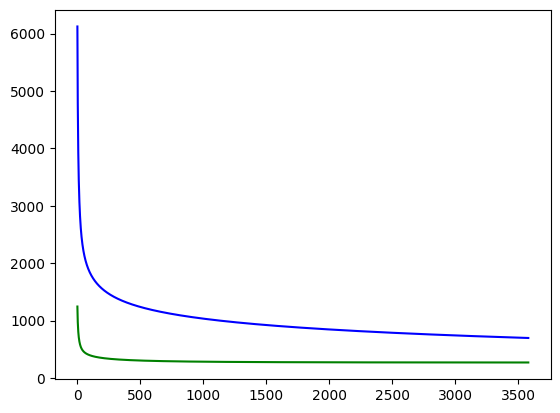

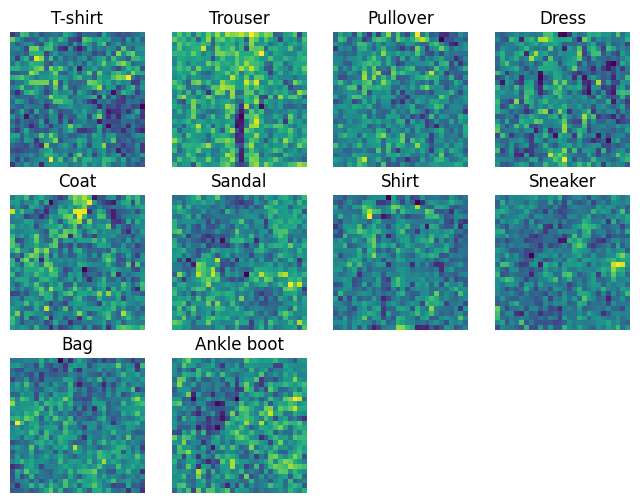

In [ ]:
from IPython.display import clear_output

plot_softmax_loss(all_train_loss, all_val_loss)
draw_weight(dec_classifier.w)
plt.show()

## Class SoftmaxRegressionTF bằng Tensorflow

Tại đây, các bạn cần định nghĩa mô hình SoftmaxRegressionTF.

### Optional TODO 8: init (10) + call (10)
Các bạn cần khởi tạo tất cả các trọng số ở hàm `init` và `call` của lớp `SoftmaxRegressionTF`. Để tiện cho việc chấm bài, các bạn vui lòng set `kernel_initializer=tf.keras.initializers.RandomNormal(seed=2020)` khi init weights. Nếu bạn không cài đặt `kernel_initializer` như yêu cầu, bạn sẽ bị mất điểm cho TODO 8 này.

In [93]:
# GRADED FUNCTION
class SoftmaxRegressionTF(tf.keras.Model):
    def __init__(self, num_class):
        super(SoftmaxRegressionTF, self).__init__()
        """ TODO 8.1: Khởi tạo mô hình cùng trọng số của mô hình. Sử dụng hàm tf.keras.layers.dense
        Xem thêm ở: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
        
        Input:
            - num_class: Số lượng class của dữ liệu.
        """ 
        ### START CODE HERE ###
        kernel_initializer = tf.keras.initializers.RandomNormal(seed=2020)
        self.dense = tf.keras.layers.Dense(num_class, activation=tf.nn.softmax)
        self.dropout = tf.keras.layers.Dropout(0.2)
        ### END CODE HERE ###

    def call(self, inputs, training=None, mask=None):
        """ TODO 8.2: Sử dụng mô hình được định nghĩa ở TODO 8.1, tính giá trị output của mô hình.
        """
        ### START CODE HERE ###
        output = self.dense(inputs)
        tf.reduce_sum(output[0, :]) 
        ### END CODE HERE ###
        try:
          output = tf.nn.softmax(output)
        except: # if softmax op does not exist on the gpu
          with tf.device('/cpu:0'):
              output = tf.nn.softmax(output) 

        return output

In [94]:
### SANITY CHECK
from turtle import shape


num_classes = 10
logistic_regressor = SoftmaxRegressionTF(num_classes)
dummy_x = tf.zeros((1, 13))
assert logistic_regressor(dummy_x).numpy().sum() == 1, "Chưa đúng"

## Huấn luyện với tensorflow

In [95]:
# Khai báo các siêu tham số
#@title Training { display-mode: "both" }
num_epoch = 100 #@param {type:"integer"}
learning_rate = 0.001 #@param {type:"number"}
batch_size = 32 #@param {type:"number"}
num_classes = 10

np.random.seed(2020)

In [96]:
# Load lại dữ liệu
train_x, train_y, val_x, val_y, test_x, test_y = get_mnist_data()

print(np.shape(train_x))
print(np.shape(val_x))
print(np.shape(test_x))
print(np.shape(train_y))
print(np.shape(val_y))
print(np.shape(test_y))


Reading fashion MNIST data...
(2500, 784)
(500, 784)
(500, 784)
(2500,)
(500,)
(500,)


In [97]:
# Chuyển dữ liệu nhãn sang dạng one-hot vector.
train_y = create_one_hot(train_y.astype(int))
val_y = create_one_hot(val_y.astype(int))
test_y = create_one_hot(test_y.astype(int))

# Chuẩn hoá dữ liệu
train_x, val_x, test_x = normalize(train_x, val_x, test_x)

# Chọn thiết bị (cpu hoặc gpu) sẽ thực hiện quá trình huấn luyện
device = '/cpu:0' if len(tf.config.experimental.list_physical_devices('GPU')) == 0 else '/gpu:0'

with tf.device(device):
    # Xây dựng mô hình và optimizer
    model = SoftmaxRegressionTF(num_classes)
    model.compile(optimizer=tf.optimizers.Adam(learning_rate), loss='binary_crossentropy',
                  metrics=['accuracy'])
    

    # Huấn luyện mô hình
    model.fit(train_x, train_y, batch_size=batch_size, epochs=num_epoch,
              validation_data=(val_x, val_y), verbose=2)
    
    
    # Đánh giá mô hình trên tập test set
    scores = model.evaluate(test_x, test_y, 32, verbose=2)
    
    y_hat = model.predict(test_x)
    confusion_mat = softmax_test(y_hat, test_y)
    
    print('Confusion matrix:')
    print(confusion_mat)
    print('Diagonal values:')
    print(confusion_mat.flatten()[0::11])

Epoch 1/100
79/79 - 1s - loss: 0.2790 - accuracy: 0.5748 - val_loss: 0.2652 - val_accuracy: 0.6920 - 1s/epoch - 13ms/step
Epoch 2/100
79/79 - 0s - loss: 0.2599 - accuracy: 0.7404 - val_loss: 0.2595 - val_accuracy: 0.7460 - 176ms/epoch - 2ms/step
Epoch 3/100
79/79 - 0s - loss: 0.2559 - accuracy: 0.7720 - val_loss: 0.2580 - val_accuracy: 0.7520 - 224ms/epoch - 3ms/step
Epoch 4/100
79/79 - 0s - loss: 0.2535 - accuracy: 0.7984 - val_loss: 0.2558 - val_accuracy: 0.7720 - 210ms/epoch - 3ms/step
Epoch 5/100
79/79 - 0s - loss: 0.2509 - accuracy: 0.8152 - val_loss: 0.2539 - val_accuracy: 0.7860 - 195ms/epoch - 2ms/step
Epoch 6/100
79/79 - 0s - loss: 0.2491 - accuracy: 0.8348 - val_loss: 0.2540 - val_accuracy: 0.7680 - 179ms/epoch - 2ms/step
Epoch 7/100
79/79 - 0s - loss: 0.2479 - accuracy: 0.8416 - val_loss: 0.2522 - val_accuracy: 0.7980 - 180ms/epoch - 2ms/step
Epoch 8/100
79/79 - 0s - loss: 0.2470 - accuracy: 0.8464 - val_loss: 0.2520 - val_accuracy: 0.8020 - 183ms/epoch - 2ms/step
Epoch 9/10